# Using K-Means: building an image compressor

Compressing image consisting of thousands of colors into image of similar size, with N amount of colors only. 

Note: 

The original image from your file will be downsized to 224 x 224 pixels for faster training process. Change the IMG_SIZE variable for different shape of image.



Credits to: DeepLearning.AI

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-07-04 22:13:35.853958: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
IMG_SIZE = 224  # The larger the image size, the better the result, but the longer your training will be

In [13]:
def load_image(img_dir):
    img = plt.imread(img_dir)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img/255
    
    return tf.constant(img)

In [3]:
def get_nearest_centroids(data, centroids):
    m, n = data.shape
    n_c = centroids.shape[0]
    nearest_index = np.zeros(shape=(m, ), dtype=int)
    
    for i in range(m):
        dist = np.zeros(shape=(n_c, ), dtype=float)
        for j in range(n_c):
            dist[j] = np.sum(np.square(data[i] - centroids[j]))
        nearest_index[i] = np.argmin(dist)
        
    return nearest_index                
    

In [4]:
def relocate_centroids(data, nearest_index, num_clusters):
    
    new_centroids = []
    for i in range(num_clusters):
        indices = np.where(nearest_index == i)[0]
        indices = data[indices]
        new_centroids.append(np.mean(indices, axis=0))
    
    return np.array(new_centroids)

In [5]:
def init_centroid(data, num_data, num_clusters):
    indices =  np.random.choice(np.arange(num_data), num_clusters, replace=False)
    return data[indices]

In [6]:
def k_means(data, num_clusters, num_iterations):
    num_data, num_features = data.shape
    centroids = init_centroid(data, num_data, num_clusters)
    
    for i in range(num_iterations):
        print(f"Iterations {i+1}/{num_iterations}")
        nearest_index = get_nearest_centroids(data, centroids)
        centroids = relocate_centroids(data, nearest_index, num_clusters)
    
    return centroids

In [7]:
def compress_image(img, num_clusters, num_iterations=10):
    
    img_size = img.shape
    img = np.array(img).reshape(-1,3)
    colors = k_means(img, num_clusters, num_iterations)
    
    nearest_index = get_nearest_centroids(img, colors)
    compressed_image = tf.constant(colors[nearest_index])
    compressed_image = tf.reshape(compressed_image, shape=(img_size[0], img_size[1], img_size[2]))
    
    return compressed_image

In [8]:
def compress_image_from_dirpath(img_dir, num_clusters, num_iterations):
    img = load_image(img_dir)
    compressed_image = compress_image(img, num_clusters, num_iterations)
    
    # this is the original image
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis(False)
    plt.title("Original Image")
    
    # this is the compressed image
    plt.subplot(1, 2, 2)
    plt.imshow(compressed_image)
    plt.axis(False)
    plt.title("Compressed Image")
    
    return compressed_image

Iterations 1/10
Iterations 2/10
Iterations 3/10
Iterations 4/10
Iterations 5/10
Iterations 6/10
Iterations 7/10
Iterations 8/10
Iterations 9/10
Iterations 10/10


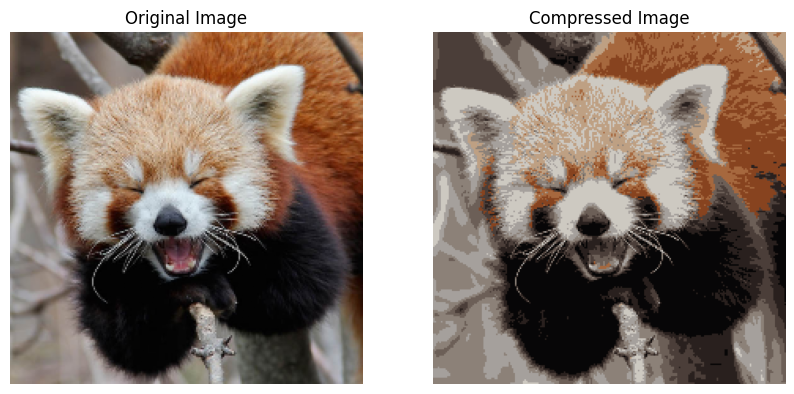

In [79]:
img_dir = "images/original/image_1.jpeg"    # path to your image file
num_clusters = 10  # compress the image into exactly this amount of colors, increase for better image result
num_iterations  = 10    # number of iterations the model is training with 

# sometimes, chosen colors are similar to each other due to poor randomization.
# in this case, try to re-run this cell if you are not satisfied with the result

compressed_image = compress_image_from_dirpath(img_dir=img_dir, num_clusters=num_clusters, num_iterations=num_iterations)

# uncomment the lines below if you want to save the image ()
img_name = img_dir.split('/')[2]
image_path = f"images/compressed/{img_name}"
tf.keras.preprocessing.image.save_img(image_path, compressed_image)